In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import scipy.interpolate
import scipy.special as sc
import glob # Module to enumerate files in the directory
from scipy import ndimage
import pylab as pl
import sys
import h5py
import scipy.optimize
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches # To create a legend manually
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import scipy.io
plt.style.use('seaborn-white')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# IEEE journals typically require figures to be very clear at a column width of around 3.5 to 4 inches
fig_width = 3.5  # in inches
fig_height = fig_width / 1.618
plt.rcParams.update({
    # Figure size and DPI
    'figure.figsize': (fig_width, fig_width / 1.618),  # IEEE column width, golden ratio height
    'figure.dpi': 300,                     # Figure resolution
    'savefig.dpi': 300,                    # Save figure resolution
    'savefig.format': 'pdf',               # Preferred format for vector graphics

    # Font settings
    'font.size': 10,                       # Main font size
    #'font.family': 'Sans-serif',           # Font family
    'font.sans-serif': ['Arial', 'Helvetica'],  # Font type

    # Axes settings
    'axes.labelsize': 12,                  # Font size of the x and y labels
    'axes.titlesize': 10,                  # Font size of the title
    'axes.linewidth': 1,                   # Edge line width

    # Tick settings
    'xtick.labelsize': 10,                  # Font size of the x tick labels
    'ytick.labelsize': 10,                  # Font size of the y tick labels
    'xtick.major.size': 4,                 # Length of major tick marks
    'xtick.minor.size': 2,                 # Length of minor tick marks
    'xtick.major.width': 1,                # Width of major tick marks
    'xtick.minor.width': 0.5,              # Width of minor tick marks
    'ytick.major.size': 4,                 # Length of major tick marks
    'ytick.minor.size': 2,                 # Length of minor tick marks
    'ytick.major.width': 1,                # Width of major tick marks
    'ytick.minor.width': 0.5,              # Width of minor tick marks

    # Legend settings
    'legend.fontsize': 8,                  # Font size of the legend
    'legend.frameon': True,               # Disable background frame
    'legend.edgecolor':'white',

    # Line settings
    'lines.linewidth': 1.5,                # Line width
    'lines.markersize': 6,                 # Marker size
    'lines.markeredgewidth' : 0.4,
    'lines.markeredgecolor' : 'black',
    # Grid settings
    'grid.alpha': 0.5,                     # Grid line transparency
    'grid.linestyle': ':',                 # Grid line style
    
    # Scatter settings
    'scatter.edgecolors': None,
    
    # Marker
    'lines.markeredgewidth' : 5,
    'lines.markeredgecolor' : 'black'

})



In [3]:
# q95 toroidally averaged
q=4

# Case 1
kappa = [1, 1.2, 1.4, 1.6, 1.8]
delta = np.linspace(-0.5, 0.5, 11)

# Case 2
kappa2 = np.linspace(1., 1.6, 7)
delta2 = [-0.3, 0, 0.3]

Curvature_a_delta = [[0 for x in range(len(delta))] for y in range(len(kappa))] 
Curvature_a_kappa = [[0 for x in range(len(kappa2))] for y in range(len(delta2))] 
Curvature_v_delta = [[0 for x in range(len(delta))] for y in range(len(kappa))] 
Curvature_v_kappa = [[0 for x in range(len(kappa2))] for y in range(len(delta2))] 



for j in range(len(kappa)):
    for i in range(len(delta)):
        C1 = 1
        C2 = (delta[i]*q) / (1+q)
        C3 = delta[i]**2 * (7*q-1) / (16 * (1+q))
        C4 = -1 * ((kappa[j] - 1) / (kappa[j] +1)) * (3*q/(q+2))
        C5 = 1 * (kappa[j]-1)**2 * (5*q-2) / (2*(kappa[j]+1)**2 * (2+q))
        Curvature_a_delta[j][i]=(C1 + C2 + C3 + C4 + C5)**(1/10)
        
for i in range(len(delta2)):
    for j in range(len(kappa2)):
        C1 = 1
        C2 = (delta2[i]*q) / (1+q)
        C3 = delta2[i]**2 * (7*q-1) / (16 * (1+q))
        C4 = -1 * ((kappa2[j] - 1) / (kappa2[j] +1)) * (3*q/(q+2))
        C5 = 1 * (kappa2[j]-1)**2 * (5*q-2) / (2*(kappa2[j]+1)**2 * (2+q))
        Curvature_a_kappa[i][j]=(C1 + C2 + C3 + C4 + C5)**(1/10)

for j in range(len(kappa)):
    for i in range(len(delta)):
        C1 = 1
        C2 = (delta[i]*q) / (1+q)
        C3 = delta[i]**2 * (7*q-1) / (16 * (1+q))
        C4 = -1 * ((kappa[j] - 1) / (kappa[j] +1)) * (3*q/(q+2))
        C5 = 1 * (kappa[j]-1)**2 * (5*q-2) / (2*(kappa[j]+1)**2 * (2+q))
        Curvature_v_delta[j][i]=(C1 + C2 + C3 + C4 + C5)**(1/2)
        
for i in range(len(delta2)):
    for j in range(len(kappa2)):
        C1 = 1
        C2 = (delta2[i]*q) / (1+q)
        C3 = delta2[i]**2 * (7*q-1) / (16 * (1+q))
        C4 = -1 * ((kappa2[j] - 1) / (kappa2[j] +1)) * (3*q/(q+2))
        C5 = 1 * (kappa2[j]-1)**2 * (5*q-2) / (2*(kappa2[j]+1)**2 * (2+q))
        Curvature_v_kappa[i][j]=(C1 + C2 + C3 + C4 + C5)**(1/2)


In [4]:
(1-0.86532609116297)/1

0.13467390883703

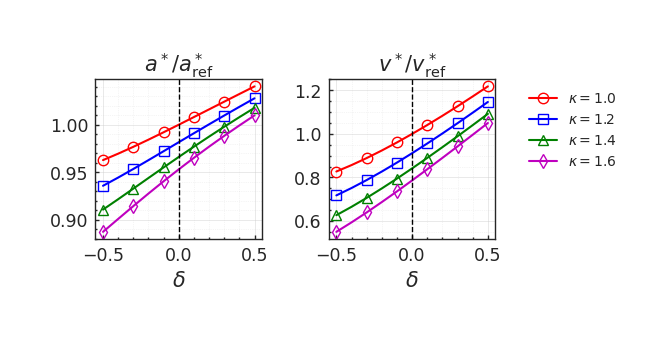

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(1,0.4), dpi=500)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axes[0].plot(delta, Curvature_a_delta[0], '-', label=r'$\kappa=1.0$', color='r', linewidth=0.3
       , marker='o', markevery=2, ms=1.5, mfc='none', mew=0.2, mec='r')
axes[0].plot(delta, Curvature_a_delta[1], '-', label=r'$\kappa=1.2$', color='b', linewidth=0.3
       , marker='s', markevery=2, ms=1.5, mfc='none', mew=0.2, mec='b')
axes[0].plot(delta, Curvature_a_delta[2], '-', label=r'$\kappa=1.4$', color='g', linewidth=0.3
       , marker='^', markevery=2, ms=1.5, mfc='none', mew=0.2, mec='g')
axes[0].plot(delta, Curvature_a_delta[3], '-', label=r'$\kappa=1.6$', color='m', linewidth=0.3
       , marker='d', markevery=2, ms=1.5, mfc='none', mew=0.2, mec='m')


axes[1].plot(delta, Curvature_v_delta[0], '-', label=r'$\kappa=1.0$', color='r', linewidth=0.3
       , marker='o', markevery=2, ms=1.5, mfc='none', mew=0.2, mec='r')
axes[1].plot(delta, Curvature_v_delta[1], '-', label=r'$\kappa=1.2$', color='b', linewidth=0.3
       , marker='s', markevery=2, ms=1.5, mfc='none', mew=0.2, mec='b')
axes[1].plot(delta, Curvature_v_delta[2], '-', label=r'$\kappa=1.4$', color='g', linewidth=0.3
       , marker='^', markevery=2, ms=1.5, mfc='none', mew=0.2, mec='g')
axes[1].plot(delta, Curvature_v_delta[3], '-', label=r'$\kappa=1.6$', color='m', linewidth=0.3
       , marker='d', markevery=2, ms=1.5, mfc='none', mew=0.2, mec='m')


for ax in axes:
    ax.grid(True, which='major', alpha=0.6, linestyle='-', linewidth=0.1)
    ax.grid(True, which='minor', alpha=0.4, linestyle=':', linewidth=0.1)

    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    #ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', direction="in", size=0.3, width=0.2,pad=1)
    ax.tick_params(which='major', direction="in", size=0.6, width=0.2,pad=1)
    ax.tick_params(axis='x', labelsize=2.5, pad=1)
    ax.tick_params(axis='y', labelsize=2.5, pad=1 )
    #ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    #ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    #ax.set_xlabel(r'$(r-r_{{sep}})$', rotation=0, size=5, labelpad=1)
    ax.set_xlabel(r'$\delta$', rotation=0, size=3, labelpad=1)
    ax.yaxis.get_offset_text().set_fontsize(4)
    #ax.yaxis.get_offset_text().set_visible(False)
    # Figure edge setting
    ax.spines["bottom"].set_linewidth(0.2)
    ax.spines["left"].set_linewidth(0.2)
    ax.spines["right"].set_linewidth(0.2)
    ax.spines["top"].set_linewidth(0.2)


#axes[0].legend(bbox_to_anchor=(1, 0.45), loc='upper right', edgecolor='white', prop={'size': 1.5}, facecolor='white' )
axes[1].legend(bbox_to_anchor=(1.8, 1), loc='upper right', edgecolor='white', 
               prop={'size': 2}, facecolor='white' )

axes[0].set_title(r'$a^*/a^*_{\rm{ref}}$', size=3, pad=1)

axes[1].set_title(r'$v^*/v^*_{\rm{ref}}$', size=3, pad=1)

axes[0].axvline(0., color='k', linestyle='--', linewidth=0.2)
axes[1].axvline(0., color='k', linestyle='--', linewidth=0.2)

# Save the figure
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
plt.savefig("Blob_scaling.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=300)
